# Feature Engineering

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection", sep='\t')
data.columns = ['label', 'body_text']

In [2]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,body_text,body_len
0,ham,Ok lar... Joking wif u oni...,24
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,U dun say so early hor... U c already then say...,39
3,ham,"Nah I don't think he goes to usf, he lives aro...",49
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116


In [4]:
import string

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9


# Feature Evaluation

In [15]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

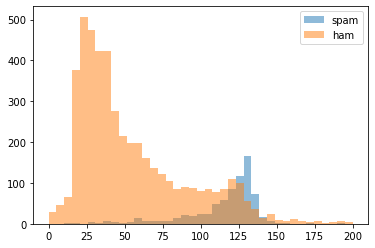

In [16]:
# Histograms

bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

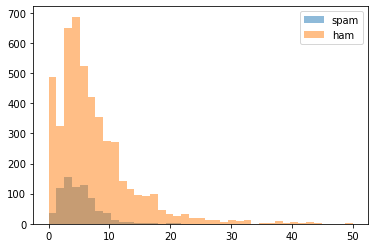

In [17]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, normalized=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, normalized=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Transformation

In [20]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's n...,116,6.9


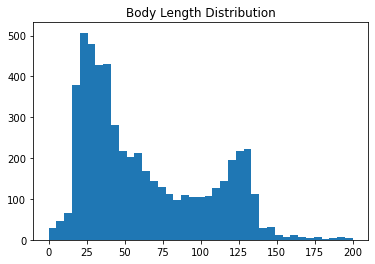

In [22]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

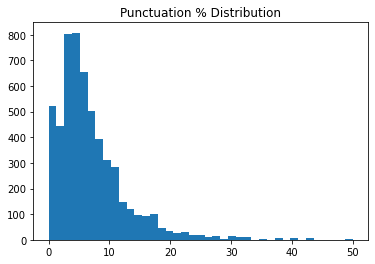

In [24]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title('Punctuation % Distribution')
pyplot.show()

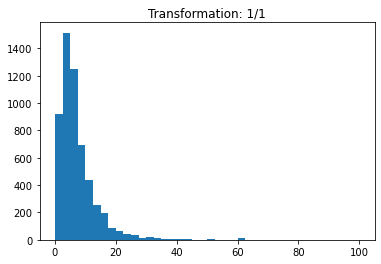

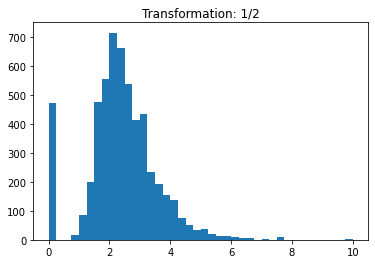

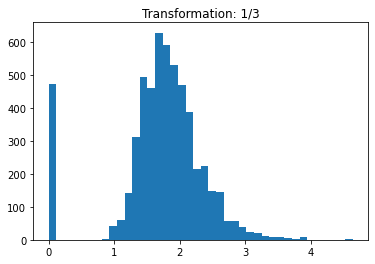

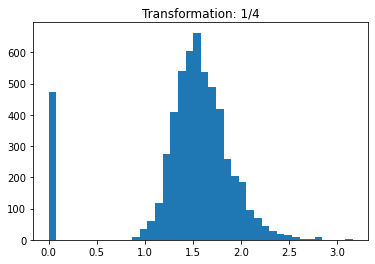

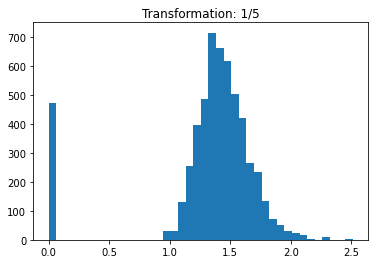

In [27]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()